# Project 3 - DTFT Explainer
Andrew Koren

This project serves to give an overview of the 2D FFT transform, including an explanation of the maths behind the transformation and what it means to work in a space outside of realspace. Part of the importance of this project comes from breaking down information stored in more than three dimensions (2 dimensions * real&imaginary values), and building intution needed to predict transformation and inverse transformation outputs.

Note: For interactive cells (widgets) you'll have to run the widget cell before using the interactive menu. Clear outputs if it starts to lag

In most projects we explore a physical system, however the DTFT tool itself is the focus of this project. An example of a "system" it is applied to is the attempt at image processing seen at the end of this project

## Going from 1D to 2D

Alongside the 1D fourier transforms we've discussed in class, there are also 2D (and higher dimension) fourier transforms. Just as the usual fourier transforms translate a signal/function to their periodic components, a 2D fourier transform can convert a 2D signal into two-dimensional periodic components. 


In 1D, we discussed the discrete fourier transform, which has the formula
$$
FT(k) = \sum_{n=0}^{N-1} f(n)e^{-i2\pi \frac{k}{N}n}
$$
Which is the discretized version of fourier series. 

Using DFT, we were able to analyze signals by the frequencies present, where amplitdue is the amplitude of the signal. 

The formula for 1D DFT is easily generalized to 2D or even higher dimensions. In short, each point in the transformed signal represents both x and y periodicity. The 2D formula is

$$
FT(u,v) = \frac{1}{MN} \sum_{m=0}^{M-1}\sum_{n=0}^{N-1} f(m,n)e^{-i 2\pi \left(\frac{u}{M}m + \frac{v}{N}n \right)}
$$
[1]

This formula is actually not super complicated, especially if you can dissect the exponential portion. Each point $(u,v)$ in the transformed space depends on all points $f(m,n)$, which are indexed through using the two sums. Each point is weighted by the exponential, which matches each real space point's weight to the k-space contribution which the point $(u,v)$ contributes. That being said, here's an example of a 2D discrete fourier transform (aka discrete-time fourier transform DTFT) looks like.

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns
from seaborn import cm
import numpy as np
from numpy import fft
from numpy.fft import fft2, ifft2

grayscale = sns.color_palette(palette='Greys')
grayscale.reverse()
gray_cmap = ListedColormap(grayscale)

In [ ]:
# for vscode inline. Should work with jupyter
#pip install ipympl ipywidgets matplotlib
%matplotlib widget

The DTFT can find the fourier transform of any image, so long as it is entirely made of complex values. Unfortunately color cannot be represented as a complex value while having a meaningful encoding for DTFT. We use the implementation from numpy.fft, and all image files have been zipped in with this project. Let's take the fourier transform of this cat.

In [ ]:
img = Image.open('grayscale-cat.jpg').convert('L') #'L' for grayscale

img_as_np = np.asarray(img)

#grayscale = sns.cm.rocket #- produces rocket cat
plt.figure()

sns.heatmap(img_as_np, cmap=grayscale, xticklabels=False, yticklabels=False, cbar=False)
plt.show()

In [ ]:
cat_fft = fft2(img_as_np)

fig, axs = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(12)

fig.suptitle('Fourier Transform plots (log)')
sns.heatmap(np.log(cat_fft).real, cmap=cm.crest, xticklabels=False, yticklabels=False, ax=axs[0, 0])
axs[0,0].set_title('Real value (.real)')
sns.heatmap(np.log(np.abs(cat_fft)), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[0, 1])
axs[0,1].set_title('Amplitude (np.abs())')

sns.heatmap(np.log(cat_fft).imag, cmap=cm.crest, xticklabels=False, yticklabels=False, ax =axs[1, 0])
axs[1,0].set_title('Imaginary value (.imag)')

sns.heatmap(np.atan2(cat_fft.imag, cat_fft.real), cmap=grayscale, xticklabels=False, yticklabels=False, ax =axs[1, 1])
axs[1,1].set_title(r'Phase $\left(\tan(im/re)\right)$')
plt.show()


Since the output is a 2D array of complex values, plotting isn't super easy. Plotting the real and imaginary values is a common approach (logarithmic plots on the left), but the information stored in the fourier transform is better represented as amplitude and phase (plots on the right), since these describe the relevance of each point in k-space relative to real space, as well as position in real space relative to k-space.

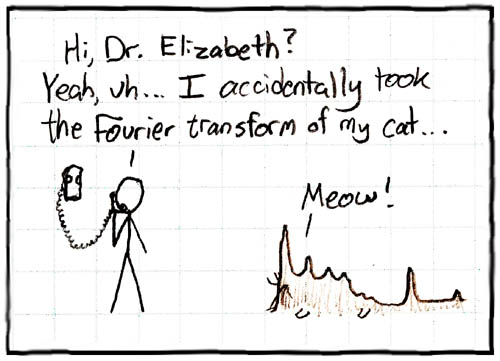 https://xkcd.com/26/

This is exactly what we've been discussing for 1D for the past week, so we should be relatively familiar with the concept by now. Even so, reading the formula doesn't provide very good intuition for what is really going on, or what we can actually use the DTFT for. To help build up intution on the meaning of the formula, let's go back a few steps and consider the transformation of a single pixel

In [ ]:
spatial_image = np.zeros((20,20))
spatial_image[10, 10] = 1

plt.figure()
plt.title('single pixel in real space')
sns.heatmap(spatial_image, xticklabels=False, yticklabels=False, cmap=grayscale)
plt.show()

The plot above is only a signle pixel located at the center of the plot, so we can actually write out the fourier transform without any summation

$$
FT_{u, v} = \frac{1}{20*20} e^{-i 2\pi \left(\frac{u}{20}10 + \frac{v}{20}10 \right)}\\
= e^{-i\pi\left(u + v \right)}/400 \\
$$
Since $e^{-i\pi*2n}=1$ and $e^{-i\pi*(2n+1)}=-1$ This results in a checkerboard pattern of periodic terms adding and subtracting, a result which is verified below.

In [ ]:
transformed_image = fft2(spatial_image)
transformed_image[:3]

The array above is the output when using the fft module of numpy. It looks like the numpy implementation does not include the division term. This makes sense, since amplitude only has importance relative to other points, so scaling down isn't especially important. The plot below shows the result of this

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(12)

fig.suptitle('Fourier Transform of a Single pixel')

sns.heatmap(np.log10(np.abs(transformed_image)), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[0])
axs[0].set_title(r'Amplitude $\left(\log_{10}\right)$')

sns.heatmap(np.atan2(transformed_image.imag, transformed_image.real), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[1])
axs[1].set_title('Phase')

This is analogous to how a dirac-delta function or some similar 'point' function must be composed of oscillating functions which cancel each other out in 1D fourier transforms

Before exploring more examples of transforms, we should mention the other half of the puzzle: the inverse DTFT. 


$$
f(m,n) = \sum_{u=0}^{M-1}\sum_{v=0}^{N-1}F(u,v)e^{i2\pi\left(\frac{u}{M}m + \frac{v}{N}n \right)}
$$

Which, for a single point at $(u,v)$ in k-space (aka 1 pixel) boils down to the same thing

$$
f(m,n) = ze^{i2\pi\left(\frac{u}{M}m + \frac{v}{N}n \right)}\\
z = F(u,v)
$$


In [ ]:
from ipywidgets import interact, IntSlider, FloatSlider
from numpy.fft import ifft2

radius = 1
def hamming_ball(grid, x, y, r, value):
    n = grid.shape[0]
    for i in range(n):
        for j in range(n):
            # Calculate the Hamming distance
            if abs(i - x) + abs(j - y) <= r:
                grid[i, j] = value
    return grid


grid_size = 40
heatmap = np.zeros((grid_size, grid_size), dtype=complex)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 4))
im0 = ax0.imshow(heatmap.real, cmap=gray_cmap, interpolation="nearest", vmin=-1, vmax=1)
ax0.set_title("k-space")
im1 = ax1.imshow(np.zeros_like(heatmap.real), cmap=gray_cmap, interpolation="nearest", vmin=-1, vmax=1)
ax1.set_title("real space")
im2 = ax2.imshow(np.zeros_like(heatmap.imag), cmap=gray_cmap, interpolation="nearest", vmin=-1, vmax=1)
ax2.set_title("imaginary space")

plt.tight_layout()

def update(x, y, phase, radius):
    global heatmap
    heatmap[:] = 0 + 0j
    value =  np.cos(phase) + 1j * np.sin(phase)
    hamming_ball(heatmap, x, y, radius, value)
    ft_heatmap = ifft2(heatmap) * 400

    im0.set_data(heatmap.real)
    im1.set_data(ft_heatmap.real)
    im2.set_data(ft_heatmap.imag)

    fig.canvas.draw_idle()

interact(
    update,
    x=IntSlider(value=1, min=0, max=grid_size - 1, step=1, description="X Position"),
    y=IntSlider(value=1, min=0, max=grid_size - 1, step=1, description="Y Position"),
    phase=FloatSlider(value=0, min=-2 * np.pi, max=2 * np.pi, step=0.1, description="Phase"),
    radius=IntSlider(value=0, min=0, max=3, step=1, description="radius")
);


It is worth noting that this version of DTFT places all low-frequency signals in the top left corner in k-space. Some versions you migt see online have both positive and negative values, resulting in low-freqency values being put in the middle of the plot.

From this toy you should be able to get an idea of what a single point in k-space represents. Any 2D image can be written as a superposition of these k-space points. I put in the radius option for fun, feel free 

Our goal is to do fourier analysis on actual images. Before we get there, we'll look at one more example to test intuition. Will a sinusoid be represented as a single point in k-space? Below, we have a 1D line. Let's see what it looks like after fourier transformation.

In [ ]:
spatial_image = np.zeros((20,20))

x = np.linspace(-2*np.pi, 2*np.pi, 20)
spatial_image[10, :] = np.sin(x)

plt.figure()
sns.heatmap(spatial_image, xticklabels=False, yticklabels=False, cmap=grayscale)
plt.title('sin(x)')
plt.xlabel(r'x ($-2\pi$ to $2\pi$)')
plt.ylabel('y')
plt.show()

In [ ]:
transformed_image = fft2(spatial_image)

fig, axs = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(12)

fig.suptitle('sin(x)')

sns.heatmap(np.log10(np.abs(transformed_image)), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[0])
axs[0].set_title(r'Amplitude $\left(\log_{10}\right)$')

sns.heatmap(np.atan2(transformed_image.imag, transformed_image.real), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[1])
axs[1].set_title('Phase');
plt.show()

Well, even if you realized that the plot would not be a single point, the result of amplitude being a line on the y-axis should be suprising. Think back on the transform function

$$
FT(u,v) = \sum_{m=0}^{M-1}\sum_{n=0}^{N-1} f(m,n)e^{-i 2\pi \left(\frac{u}{M}m + \frac{v}{N}n \right)}
$$

When scanning through real space values $f(m,n)$, the only value not equal to zero is when $n=10$

$$
FT(u,v) = \sum_{m=0}^{M-1} f(m,10)e^{-i 2\pi \left(u\frac{m}{20}+ v\frac{1}{2} \right)}
$$
It should be clear that this will have alternating phase sliding through $v$. For $u=0$, the exponential has no $m$ dependence, resulting in all real-space $x$ values being weighted equally. This means the FT scans through the domain of $\sin$, which sums to zero. 

interactive(children=(IntSlider(value=10, description='X Position', max=19), IntSlider(value=10, description='…

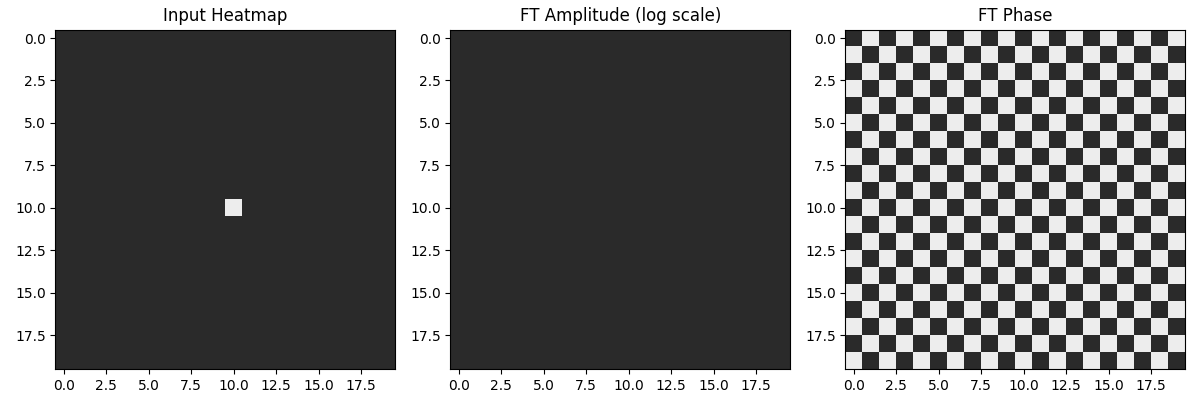

In [34]:
np.seterr(divide = 'ignore') 

grid_size = 20
heatmap = np.zeros((grid_size, grid_size))

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 4))

im0 = ax0.imshow(heatmap, cmap=gray_cmap, interpolation="nearest", vmin=0, vmax=1)
ax0.set_title("Input Heatmap")
im1 = ax1.imshow(np.log10(np.zeros_like(heatmap)), cmap=gray_cmap, interpolation="nearest", vmin=0, vmax=1)
ax1.set_title("FT Amplitude (log scale)")
im2 = ax2.imshow(np.zeros_like(heatmap), cmap=gray_cmap, interpolation="nearest", vmin=0, vmax=np.pi)
ax2.set_title("FT Phase")

plt.tight_layout()

# Update function
def update(x, y, radius):
    global heatmap
    heatmap[:] = 0
    hamming_ball(heatmap, x, y, radius, 1)
    ft_heatmap = fft2(heatmap)

    # Update images
    im0.set_data(heatmap)
    im1.set_data(np.log10(abs(ft_heatmap)))
    im2.set_data(np.arctan2(ft_heatmap.imag, ft_heatmap.real))

    # Redraw the figure
    fig.canvas.draw_idle()

# Set up sliders
interact(
    update,
    x=IntSlider(value=10, min=0, max=grid_size - 1, step=1, description="X Position"),
    y=IntSlider(value=10, min=0, max=grid_size - 1, step=1, description="Y Position"),
    radius=IntSlider(value=0, min=0, max=5, step=1, description="Radius")
);


This plot should show two more very important ideas: the amplitude plot is independent of the position of the image, and the phase stores location information. Compared to amplitude information, phase information is much more difficult to read. 

Since this project is about a month overdue, I'm going to submit it now. Better than a zero!

## Personal Question - Removing watermark

An important thing we saw above is that many pixels on a fourier transformed image affect a single pixel on a normal plot. My question is: can we remove a periodic watermark from an image while keeping the original intact? Let's see if crossing lines can be removed

In [ ]:
img2 = Image.open('grayscale-xover (1).png').convert('L')
img_as_np2 = np.asarray(img2)

plt.figure()
sns.heatmap(img_as_np2, cmap=grayscale, xticklabels=False, yticklabels=False)
plt.show()

In [ ]:
inverted_cat = 255 - img_as_np2

plt.figure()
sns.heatmap(inverted_cat, cmap=grayscale, xticklabels=False, yticklabels=False)
plt.show()

In [ ]:

masked_cat_fft = fft2(inverted_cat)

fig, axs = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(12)

fig.suptitle('Fourier Transform of a Cat')

sns.heatmap(np.log10(np.abs(masked_cat_fft)), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[0])
axs[0].set_title(r'Amplitude $\left(\log_{10}\right)$')

sns.heatmap(np.atan2(masked_cat_fft.imag, masked_cat_fft.real), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[1])
axs[1].set_title('Phase')

plt.show()

In [ ]:
large_amp_removed = np.where(np.abs(masked_cat_fft) > 10**6, masked_cat_fft/np.abs(masked_cat_fft), masked_cat_fft)

fig, axs = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(12)

fig.suptitle('Fourier Transform of a Cat (large amp removed)')

sns.heatmap(np.log10(np.abs(large_amp_removed)), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[0])
axs[0].set_title(r'Amplitude $\left(\log_{10}\right)$')

sns.heatmap(np.atan2(large_amp_removed.imag, large_amp_removed.real), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[1])
axs[1].set_title('Phase')

plt.show()

In [ ]:
inverted_cat_modified = ifft2(large_amp_removed)
cat_modified = 255- inverted_cat_modified

fig, (ax0, ax1) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(12)

sns.heatmap(cat_modified.real, cmap=grayscale, xticklabels=False, yticklabels=False, ax = ax0)

min = cat_modified.max() - 255
cat_modified[cat_modified<min] = min

sns.heatmap(cat_modified.real, cmap=grayscale, xticklabels=False, yticklabels=False, ax = ax1)

plt.show()

Well, that didn't quite work out. Since our cat is quite colorful and is on a big white background, our image needs many low-frequency contributions to create the overall average of the image. It's hard to determine what affect the mask actually has on the image, but fourier transformation allows for us to do stuff

In [ ]:
mask_fft = fft2(img_as_np2)-cat_fft

fig, axs = plt.subplots(1, 4)
fig.set_figheight(5)
fig.set_figwidth(20)

fig.suptitle('FFT of masked cat, minus the cat')

sns.heatmap(np.log10(np.abs(mask_fft)), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[0])
axs[0].set_title(r'Amplitude $\left(\log_{10}\right)$')

sns.heatmap(np.atan2(mask_fft.imag, mask_fft.real), cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[1])
axs[1].set_title('Phase')

mask = ifft2(mask_fft)
sns.heatmap(mask.real, cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[2])
axs[2].set_title(r'Original mask returned')

# Make all pixels uniform like the mask
mask[mask>-2] = 255
mask[mask<=-2] = 0
sns.heatmap(mask.real, cmap=grayscale, xticklabels=False, yticklabels=False, ax=axs[3])
axs[3].set_title(r'cleaned mask')

plt.show()

In [ ]:
frogimg = Image.open('frog_w_hat.png').convert('L')
frog = np.asarray(frogimg)

plt.figure()
sns.heatmap(frog, cmap=grayscale, xticklabels=False, yticklabels=False)
plt.show()

In [ ]:
frog_fft = fft2(frog)
masked_frog_fft = frog_fft + mask_fft
masked_frog = ifft2(frog_fft + mask_fft)
masked_frog[masked_frog < 0] = 0

plt.figure()
sns.heatmap(masked_frog.real, cmap=grayscale, xticklabels=False, yticklabels=False)
plt.show()

In [ ]:
mask = Image.open('mask.png').convert('L')
np_mask = np.asarray(mask)

masked_cat = np.where(np_mask > 2, fft2(img_as_np2), 0)

fig, axs = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(16)

fig.suptitle('Attempt at removing watermark')

sns.heatmap(np.log10(np.abs(masked_cat)), cmap=grayscale, ax=axs[0], xticklabels=False, yticklabels=False)
axs[0].set_title('mask applied to transform')

my_cat = ifft2(masked_cat)
my_cat[my_cat<0] = 0
sns.heatmap(my_cat.real, cmap=grayscale, ax=axs[1], xticklabels=False, yticklabels=False, cbar=False)
axs[1].set_title('inverse transform after mask is applied (normalized)')

sns.heatmap(img_as_np2, cmap=grayscale, xticklabels=False, yticklabels=False, cbar=False)
axs[2].set_title('original image');


plt.show()

Okay so not exactly cleared up. Seeing the result of applying the mask helps diagnose what went wrong. Remember that spatial information is stored in the phase of all points in the plot. While the mask took out the majority of the crossing lines, the location of the lines is still stored in the phases of all points, so they still appear.

Sources:

[https://en.wikipedia.org/wiki/Fourier_transform](https://en.wikipedia.org/wiki/Fourier_transform) <br>
[https://www.robots.ox.ac.uk/~az/lectures/ia/lect2.pdf](https://www.robots.ox.ac.uk/~az/lectures/ia/lect2.pdf) <br>
[https://www.corsi.univr.it/documenti/OccorrenzaIns/matdid/matdid027832.pdf#page=3.00](https://www.corsi.univr.it/documenti/OccorrenzaIns/matdid/matdid027832.pdf#page=3.00)